In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('transformed_new.csv')

In [3]:
data

,Unnamed: 0,crop_flow_lb_s,datetime,field,product_Corn,product_Soybeans,product_Wheat,PC1,PC2,PC3,PC4,PC5,PC6,PC7,month,year
0,0,0.00,1255701600,17,0,1,0,3.781658,1.597206,-0.231569,0.327539,-0.422582,0.499634,-0.862528,10,2009
1,1,4.80,1255701600,17,0,1,0,3.713158,1.502763,-0.156346,0.495098,-0.623663,0.532004,-0.868154,10,2009
2,2,4.68,1255701600,23,0,1,0,3.872774,1.673078,-0.514877,0.147105,-0.545803,1.158249,-0.604078,10,2009
3,3,3.98,1255701600,23,0,1,0,3.875117,1.675503,-0.520415,0.142061,-0.545247,1.168495,-0.599825,10,2009
4,4,2.98,1255701600,23,0,1,0,3.894926,1.694252,-0.573709,0.100911,-0.554342,1.279905,-0.555002,10,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350440,350440,10.60,1184004000,16,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007
350441,350441,9.90,1184004000,16,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007
350442,350442,10.40,1184004000,16,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007
350443,350443,9.70,1184004000,16,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007


In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df=data.copy()
df

,crop_flow_lb_s,datetime,field,product_Corn,product_Soybeans,product_Wheat,PC1,PC2,PC3,PC4,PC5,PC6,PC7,month,year
0,0.00,1255701600,17,0,1,0,3.781658,1.597206,-0.231569,0.327539,-0.422582,0.499634,-0.862528,10,2009
1,4.80,1255701600,17,0,1,0,3.713158,1.502763,-0.156346,0.495098,-0.623663,0.532004,-0.868154,10,2009
2,4.68,1255701600,23,0,1,0,3.872774,1.673078,-0.514877,0.147105,-0.545803,1.158249,-0.604078,10,2009
3,3.98,1255701600,23,0,1,0,3.875117,1.675503,-0.520415,0.142061,-0.545247,1.168495,-0.599825,10,2009
4,2.98,1255701600,23,0,1,0,3.894926,1.694252,-0.573709,0.100911,-0.554342,1.279905,-0.555002,10,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350440,10.60,1184004000,16,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007
350441,9.90,1184004000,16,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007
350442,10.40,1184004000,16,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007
350443,9.70,1184004000,16,0,0,1,-4.100974,-0.358484,0.172790,-0.145473,0.453026,0.124937,-0.427422,7,2007


In [6]:
pip install pandas numpy scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [8]:
# Step 1: Split the dataset into train, validation, and test datasets

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Separate features (X) and target variable (y) for each dataset
X_train, y_train = train_data.drop('crop_flow_lb_s', axis=1), train_data['crop_flow_lb_s']
X_val, y_val = val_data.drop('crop_flow_lb_s', axis=1), val_data['crop_flow_lb_s']
X_test, y_test = test_data.drop('crop_flow_lb_s', axis=1), test_data['crop_flow_lb_s']

# Step 2: Create an XGBoostRegressor base model and train on the training data

base_model = XGBRegressor(random_state=42, n_estimators=30)  # Set n_estimators to 30 for 30 epochs
base_model.fit(X_train, y_train)

# Step 3: Test the base model on validation and test data
base_model_predictions_val = base_model.predict(X_val)
base_model_predictions_test = base_model.predict(X_test)


In [9]:
def evaluate_model(predictions, true_values, model_name):
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    r2 = r2_score(true_values, predictions)
    
    print(f"Results for {model_name}:")
    print(f"RMSE: {round(rmse, 6)}")
    print(f"MAE: {round(mae, 6)}")
    print(f"MSE: {round(mse, 6)}")
    print(f"R2 Score: {round(r2, 6)}")
    print("\n")

# Evaluate the base model
evaluate_model(base_model_predictions_val, y_val, "Base Model on Validation Data")
evaluate_model(base_model_predictions_test, y_test, "Base Model on Test Data")


Results for Base Model on Validation Data:
RMSE: 3.061387
MAE: 2.220763
MSE: 9.37209
R2 Score: 0.496102


Results for Base Model on Test Data:
RMSE: 3.054668
MAE: 2.207923
MSE: 9.330996
R2 Score: 0.486645




In [10]:
# Step 4: Apply hyperparameter tuning to create two improved models

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

hyper_model_1 = XGBRegressor(random_state=42)
hyper_model_2 = XGBRegressor(random_state=42)

grid_search_1 = GridSearchCV(hyper_model_1, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search_1.fit(X_train, y_train)

grid_search_2 = GridSearchCV(hyper_model_2, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search_2.fit(X_train, y_train)

# Get the best hyperparameters
best_params_1 = grid_search_1.best_params_
best_params_2 = grid_search_2.best_params_

# Train the models with the best hyperparameters on the full training set
best_model_1 = XGBRegressor(**best_params_1, random_state=42)
best_model_1.fit(X_train, y_train)

best_model_2 = XGBRegressor(**best_params_2, random_state=42)
best_model_2.fit(X_train, y_train)

# Test the models on validation and test data
best_model_predictions_val_1 = best_model_1.predict(X_val)
best_model_predictions_test_1 = best_model_1.predict(X_test)

best_model_predictions_val_2 = best_model_2.predict(X_val)
best_model_predictions_test_2 = best_model_2.predict(X_test)

# Evaluate the improved models on validation data
evaluate_model(best_model_predictions_val_1, y_val, "Improved Model 1 on Validation Data")

evaluate_model(best_model_predictions_val_2, y_val, "Improved Model 2 on Validation Data")


Results for Improved Model 1 on Validation Data:
RMSE: 2.599462
MAE: 1.849495
MSE: 6.757205
R2 Score: 0.636693


Results for Improved Model 2 on Validation Data:
RMSE: 2.599462
MAE: 1.849495
MSE: 6.757205
R2 Score: 0.636693




In [15]:
# Evaluate the improved models on test data
evaluate_model(best_model_predictions_test_1, y_test, "Improved Model 1 on Test Data")
evaluate_model(best_model_predictions_test_2, y_test, "Improved Model 2 on Test Data")

Results for Improved Model 1 on Test Data:
RMSE: 2.591711
MAE: 1.840846
MSE: 6.716967
R2 Score: 0.630458


Results for Improved Model 2 on Test Data:
RMSE: 2.293120
MAE: 1.654334
MSE: 6.436667
R2 Score: 0.712422




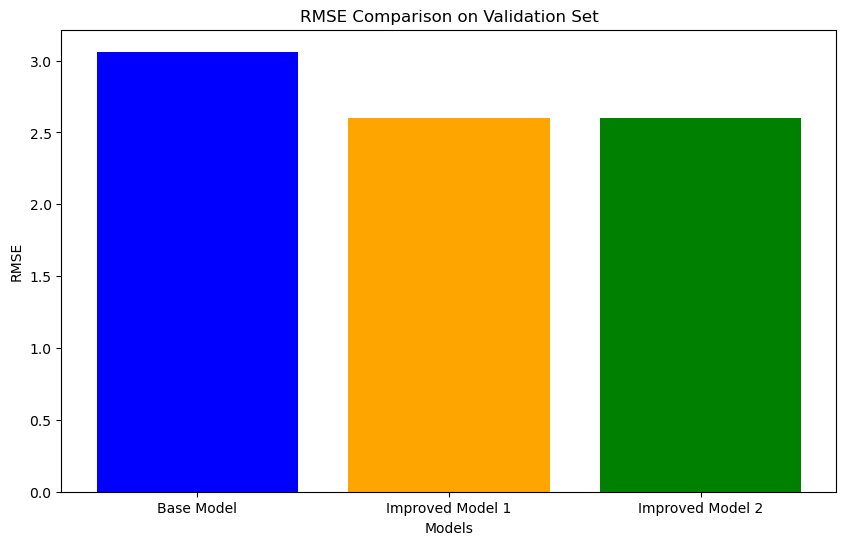

In [16]:
import matplotlib.pyplot as plt

# Function to create bar charts for each metric
def plot_metrics(metric_values, model_names, metric_name, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, metric_values, color=['blue', 'orange', 'green'])
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Comparison on {dataset_name}')
    plt.show()

# Gather metric values for the base model and improved models
rmse_values_val = [
    np.sqrt(mean_squared_error(y_val, base_model_predictions_val)),
    np.sqrt(mean_squared_error(y_val, best_model_predictions_val_1)),
    np.sqrt(mean_squared_error(y_val, best_model_predictions_val_2))
]

mae_values_val = [
    mean_absolute_error(y_val, base_model_predictions_val),
    mean_absolute_error(y_val, best_model_predictions_val_1),
    mean_absolute_error(y_val, best_model_predictions_val_2)
]

mse_values_val = [
    mean_squared_error(y_val, base_model_predictions_val),
    mean_squared_error(y_val, best_model_predictions_val_1),
    mean_squared_error(y_val, best_model_predictions_val_2)
]

r2_values_val = [
    r2_score(y_val, base_model_predictions_val),
    r2_score(y_val, best_model_predictions_val_1),
    r2_score(y_val, best_model_predictions_val_2)
]

# Plot bar charts for validation metrics
plot_metrics(rmse_values_val, ['Base Model', 'Improved Model 1', 'Improved Model 2'], 'RMSE', 'Validation Set')
# plot_metrics(mae_values_val, ['Base Model', 'Improved Model 1', 'Improved Model 2'], 'MAE', 'Validation Set')
# plot_metrics(mse_values_val, ['Base Model', 'Improved Model 1', 'Improved Model 2'], 'MSE', 'Validation Set')
# plot_metrics(r2_values_val, ['Base Model', 'Improved Model 1', 'Improved Model 2'], 'R2 Score', 'Validation Set')


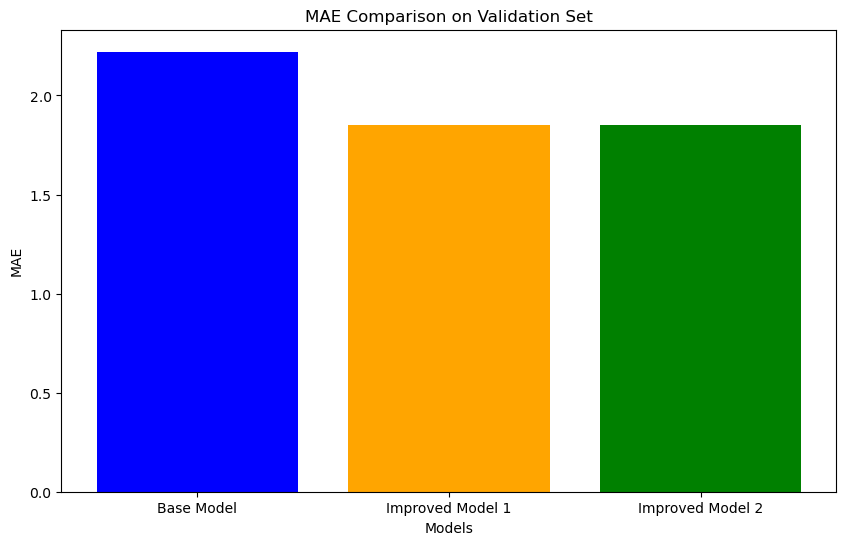

In [17]:
plot_metrics(mae_values_val, ['Base Model', 'Improved Model 1', 'Improved Model 2'], 'MAE', 'Validation Set')


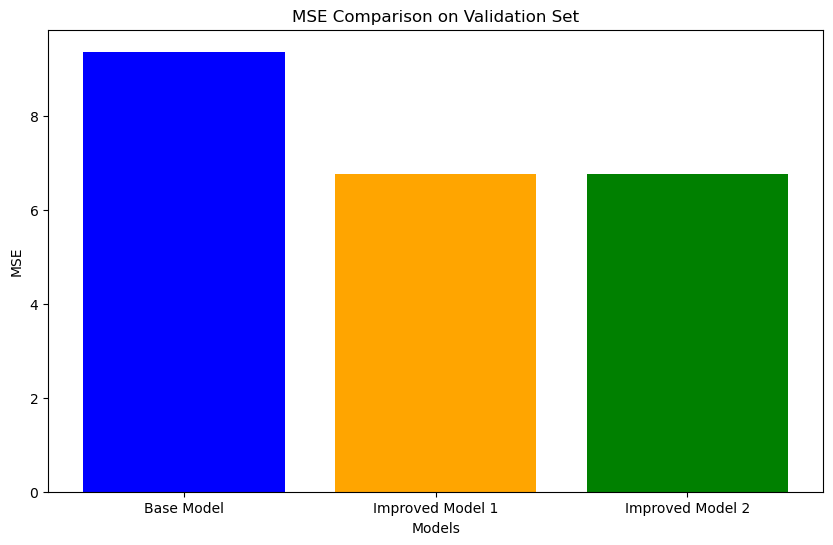

In [18]:
plot_metrics(mse_values_val, ['Base Model', 'Improved Model 1', 'Improved Model 2'], 'MSE', 'Validation Set')


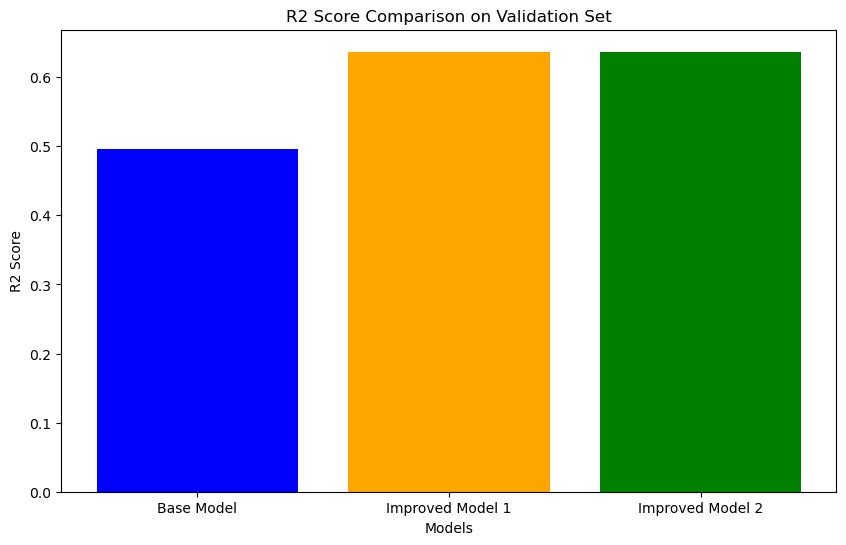

In [19]:
plot_metrics(r2_values_val, ['Base Model', 'Improved Model 1', 'Improved Model 2'], 'R2 Score', 'Validation Set')


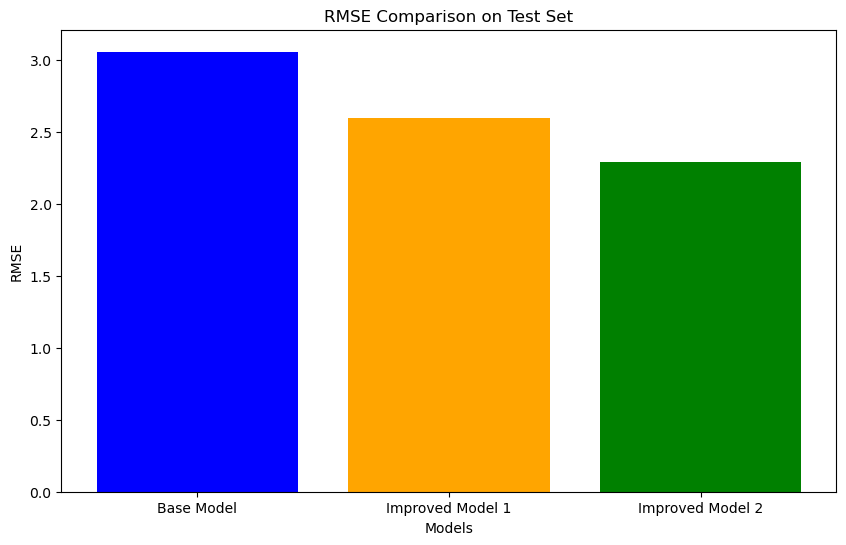

In [24]:
# Gather metric values for the test set
rmse_values_test = [
    np.sqrt(mean_squared_error(y_test, base_model_predictions_test)),
    np.sqrt(mean_squared_error(y_test, best_model_predictions_test_1)),
    np.sqrt(mean_squared_error(y_test, best_model_predictions_test_2))]

mae_values_test = [
    mean_absolute_error(y_test, base_model_predictions_test),
    mean_absolute_error(y_test, best_model_predictions_test_1),
    mean_absolute_error(y_test, best_model_predictions_test_2)]

mse_values_test = [
    mean_squared_error(y_test, base_model_predictions_test),
    mean_squared_error(y_test, best_model_predictions_test_1),
    mean_squared_error(y_test, best_model_predictions_test_2)
]

r2_values_test = [
    r2_score(y_test, base_model_predictions_test),
    r2_score(y_test, best_model_predictions_test_1),
    r2_score(y_test, best_model_predictions_test_2)
]

# Plot bar charts for test metrics
plot_metrics(rmse_values_test, ['Base Model', 'Improved Model 1', 'Improved Model 2'], 'RMSE', 'Test Set')
# plot_metrics(mae_values_test, ['Base Model', 'Improved Model 1', 'Improved Model 2'], 'MAE', 'Test Set')
# plot_metrics(mse_values_test, ['Base Model', 'Improved Model 1', 'Improved Model 2'], 'MSE', 'Test Set')
# plot_metrics(r2_values_test, ['Base Model', 'Improved Model 1', 'Improved Model 2'], 'R2 Score', 'Test Set')


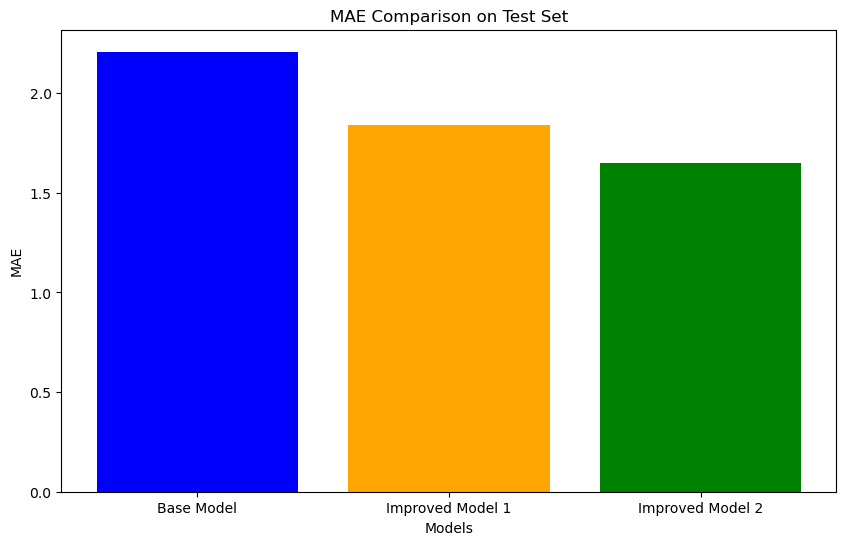

In [25]:
plot_metrics(mae_values_test, ['Base Model', 'Improved Model 1', 'Improved Model 2'], 'MAE', 'Test Set')


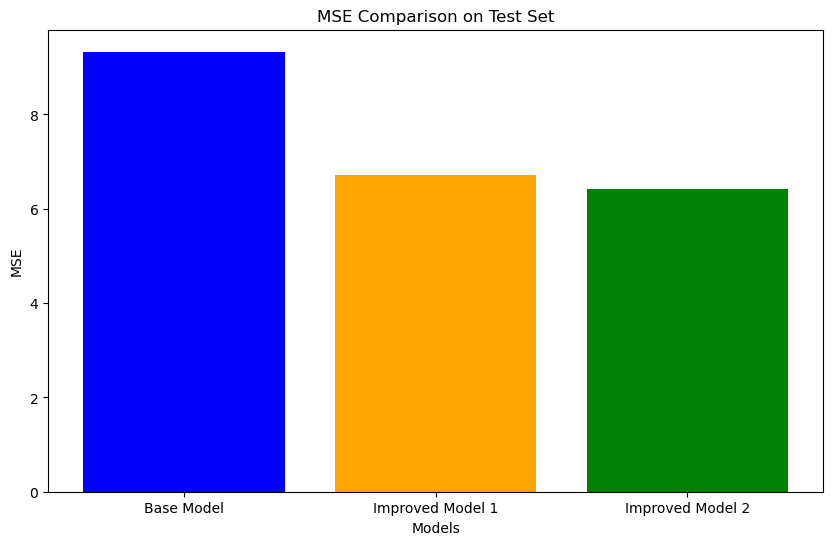

In [26]:
plot_metrics(mse_values_test, ['Base Model', 'Improved Model 1', 'Improved Model 2'], 'MSE', 'Test Set')


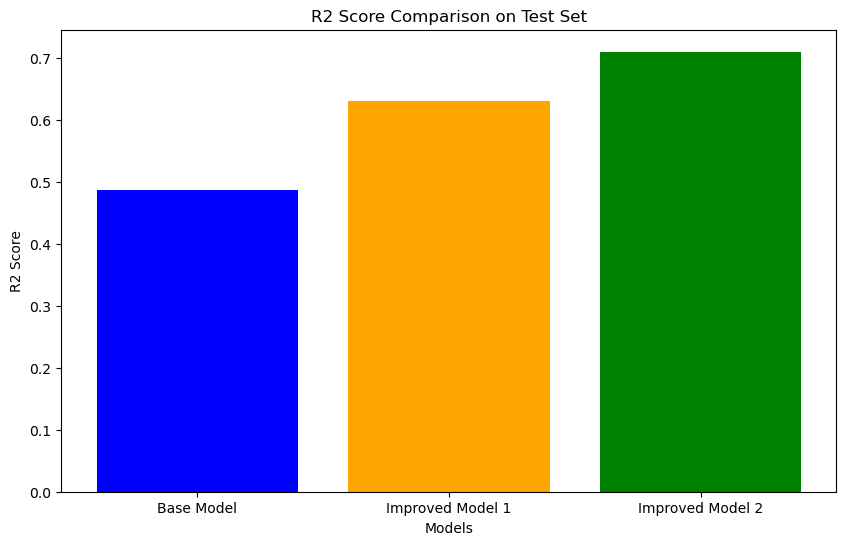

In [27]:
plot_metrics(r2_values_test, ['Base Model', 'Improved Model 1', 'Improved Model 2'], 'R2 Score', 'Test Set')
